<a href="https://colab.research.google.com/github/qfx4yk/ds1002-qfx4yk/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [28]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)

even_or_odd <- function(var1) { if (var1 %% 2 == 1) {
    odd_statement <- paste("The integer", var1, "is odd")
    return(odd_statement)
  } else if (var1 %% 2 == 0) {
    even_statement <- paste("The integer", var1, "is even")
    return(even_statement)
  } else {
    error_statement <- paste("Please pass in an integer")
    return(error_statement)
  }

}

In [30]:
# execute the function twice using two different input values, displaying even and odd results.

even_or_odd(2)
even_or_odd(3)
even_or_odd(457243142536)
even_or_odd(67)
even_or_odd(3.4)
even_or_odd(7/8)

[1] "The integer 2 is even"

[1] "The integer 3 is odd"

[1] "The integer 457243142536 is even"

[1] "The integer 67 is odd"

[1] "Please pass in an integer"

[1] "Please pass in an integer"

In [42]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.

mean_value <- function(a=1,b=2,c=3,d=4) {
  values <- c(a,b,c,d)
  return(mean(values))
}

In [43]:
# then execute the function twice: once where you provide the input values, and once where you do not.

mean_value(2,3,4,5)
mean_value()

[1] 3.5

[1] 2.5

## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

In [ ]:
library(tidyverse)
library(ggplot2)
install.packages("gapminder")
library(gapminder)

In [50]:
# read in sample data set
head(msleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


In [61]:
str(msleep)

tibble [83 × 11] (S3: tbl_df/tbl/data.frame)
 $ name        : chr [1:83] "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ genus       : chr [1:83] "Acinonyx" "Aotus" "Aplodontia" "Blarina" ...
 $ vore        : chr [1:83] "carni" "omni" "herbi" "omni" ...
 $ order       : chr [1:83] "Carnivora" "Primates" "Rodentia" "Soricomorpha" ...
 $ conservation: chr [1:83] "lc" NA "nt" "lc" ...
 $ sleep_total : num [1:83] 12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sleep_rem   : num [1:83] NA 1.8 2.4 2.3 0.7 2.2 1.4 NA 2.9 NA ...
 $ sleep_cycle : num [1:83] NA NA NA 0.133 0.667 ...
 $ awake       : num [1:83] 11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ brainwt     : num [1:83] NA 0.0155 NA 0.00029 0.423 NA NA NA 0.07 0.0982 ...
 $ bodywt      : num [1:83] 50 0.48 1.35 0.019 600 ...


In [97]:
# display only animals with body weights of 30 or greater
# group the animals by order
df2 <- msleep %>%
  filter(bodywt >= 30) %>%
  group_by(order) %>%
  summarise(Mean_sleep_total = mean(sleep_total))

df2

order,Mean_sleep_total
<chr>,<dbl>
Artiodactyla,4.820000
Carnivora,10.250000
Cetacea,4.500000
Cingulata,18.100000
Perissodactyla,3.466667
Primates,8.850000
Proboscidea,3.600000


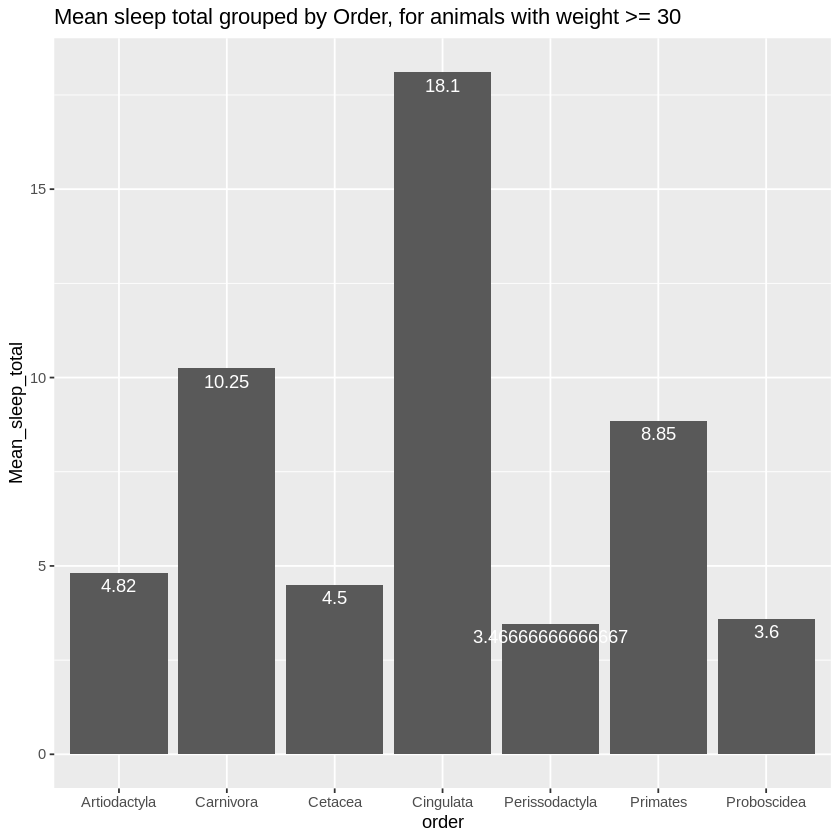

In [121]:
# display the mean sleep_total for each group in a bar plot
ggplot(df2, aes(x=order, y=Mean_sleep_total)) +
  geom_bar(stat="identity") +
  geom_text(aes(y=Mean_sleep_total, label=Mean_sleep_total),
    vjust=1.5, position=position_dodge(.9), colour="white") +
  ggtitle("Mean sleep total grouped by Order, for animals with weight >= 30")

## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [123]:
# read csv file

df <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv")

In [129]:
# get basic information about df

str(df)

'data.frame':	1318 obs. of  8 variables:
 $ username  : chr  "ckippen0" "tgergler1" "spomfrett2" "rphettis3" ...
 $ full_name : chr  "Clevey Kippen" "Tedi Gergler" "Steffie Pomfrett" "Ruddy Phettis" ...
 $ birthdate : chr  "5/1/1991" "10/5/1998" "" "6/18/1984" ...
 $ email     : chr  "ckippen0@t-online.de" "tgergler1@salon.com" "spomfrett2@imdb.com" "rphettis3@npr.org" ...
 $ continent : chr  NA NA NA "EU" ...
 $ followers : int  12362 21360 19530 80047 33544 72161 42669 22516 93923 18554 ...
 $ last_login: chr  "5/16/2023" "8/20/2020" "11/19/2022" "9/20/2023" ...
 $ interests : chr  "music" "sports" "sports" "travel" ...


In [126]:
# display number of duplicate rows

nrow(df[duplicated(df), ])

[1] 318

In [128]:
# remove duplicate rows

df2 <- df[!duplicated(df), ]

In [131]:
# get basic information about df2 to make sure duplicates have been removed

str(df2)

'data.frame':	1000 obs. of  8 variables:
 $ username  : chr  "ckippen0" "tgergler1" "spomfrett2" "rphettis3" ...
 $ full_name : chr  "Clevey Kippen" "Tedi Gergler" "Steffie Pomfrett" "Ruddy Phettis" ...
 $ birthdate : chr  "5/1/1991" "10/5/1998" "" "6/18/1984" ...
 $ email     : chr  "ckippen0@t-online.de" "tgergler1@salon.com" "spomfrett2@imdb.com" "rphettis3@npr.org" ...
 $ continent : chr  NA NA NA "EU" ...
 $ followers : int  12362 21360 19530 80047 33544 72161 42669 22516 93923 18554 ...
 $ last_login: chr  "5/16/2023" "8/20/2020" "11/19/2022" "9/20/2023" ...
 $ interests : chr  "music" "sports" "sports" "travel" ...


In [153]:
# remove any records where last_login or birthdate are empty

df2[df2==""] <- NA
df2_no_empty <- df2[complete.cases(df2$last_login, df2$birthdate), ]

str(df2_no_empty)

'data.frame':	650 obs. of  8 variables:
 $ username  : chr  "ckippen0" "tgergler1" "rphettis3" "ttotman6" ...
 $ full_name : chr  "Clevey Kippen" "Tedi Gergler" "Ruddy Phettis" "Tamqrah Totman" ...
 $ birthdate : chr  "5/1/1991" "10/5/1998" "6/18/1984" "8/7/1986" ...
 $ email     : chr  "ckippen0@t-online.de" "tgergler1@salon.com" "rphettis3@npr.org" "ttotman6@elpais.com" ...
 $ continent : chr  NA NA "EU" "AF" ...
 $ followers : int  12362 21360 80047 42669 93923 46304 16786 85070 93981 31745 ...
 $ last_login: chr  "5/16/2023" "8/20/2020" "9/20/2023" "3/10/2023" ...
 $ interests : chr  "music" "sports" "travel" "music" ...


In [154]:
# display only the records with the 10 highest follower counts

df3_arranged_followers <- df2_no_empty %>%
  arrange(desc(followers))

df3_arranged_followers[(1:10),]

,username,full_name,birthdate,email,continent,followers,last_login,interests
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,lleckeyb6,Lynne Leckey,4/19/1998,lleckeyb6@tripadvisor.com,SA,99977,3/14/2021,sports
2,spharoaha2,Staci Pharoah,9/2/1985,spharoaha2@sfgate.com,NA,99905,10/26/2023,sports
3,cduftondy,Celisse Dufton,8/24/1995,cduftondy@ox.ac.uk,OC,99707,9/26/2021,sports
4,dbartalin77,Desiree Bartalin,8/23/1993,dbartalin77@usda.gov,AF,99618,5/30/2022,music
5,grivardmp,Gwen Rivard,9/12/1982,grivardmp@google.com.hk,OC,99526,4/4/2020,music
6,mraggitt9g,Morgan Raggitt,11/16/1992,mraggitt9g@home.pl,NA,99508,11/12/2021,music
7,wbenese7,Wain Benes,3/9/1998,wbenese7@ebay.com,NA,99400,10/1/2021,travel
8,kmorriceht,Kitti Morrice,6/3/1995,kmorriceht@privacy.gov.au,SA,98936,3/24/2021,sports
9,smacdonnell7o,Shoshanna MacDonnell,9/12/2002,smacdonnell7o@toplist.cz,AS,98760,7/20/2021,music


In [176]:
# determine counts of users when grouped by continent

df4_grouped <- df2_no_empty %>%
  group_by(continent) %>%
  summarise(User_count = n())

df4_grouped

continent,User_count
<chr>,<int>
AF,70
AS,111
EU,77
OC,95
SA,69
NA,228
